## Cargamos las Librerías:

In [2]:
import requests
import pandas as pd
import os
import numpy as np
from dotenv import load_dotenv

## Cargamos el Token:

In [3]:
load_dotenv(dotenv_path='/home/barea/INEGI_API/.env')

token = os.getenv("INEGI_TOKEN")

## ID del Indicador:

In [4]:
serie_id = "1002000038,1002000039"

## EndPoint de Consulta:

In [5]:
url = f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/{serie_id}/es/0700/false/BISE/2.0/{token}?type=json"

In [6]:
print(url)

https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000038,1002000039/es/0700/false/BISE/2.0/0f3e8a33-8776-d1b7-2615-657d9245b616?type=json


## Hacemos la Solicitud:

In [7]:
response = requests.get(url)
data = response.json()

In [8]:
data

{'Header': {'Name': 'Datos compactos BISE',
  'Email': 'atencion.usuarios@inegi.org.mx'},
 'Series': [{'INDICADOR': '1002000038',
   'FREQ': '3',
   'TOPIC': '128',
   'UNIT': '551',
   'UNIT_MULT': '',
   'NOTE': '50',
   'SOURCE': '3355',
   'LASTUPDATE': '27/09/2024 12:00:00 a. m.',
   'STATUS': None,
   'OBSERVATIONS': [{'TIME_PERIOD': '1994',
     'OBS_VALUE': '671640.00000000000000000000',
     'OBS_EXCEPTION': None,
     'OBS_STATUS': '3',
     'OBS_SOURCE': '',
     'OBS_NOTE': '',
     'COBER_GEO': '0700'},
    {'TIME_PERIOD': '1995',
     'OBS_VALUE': '658114.00000000000000000000',
     'OBS_EXCEPTION': None,
     'OBS_STATUS': '3',
     'OBS_SOURCE': '',
     'OBS_NOTE': '',
     'COBER_GEO': '0700'},
    {'TIME_PERIOD': '1996',
     'OBS_VALUE': '670523.00000000000000000000',
     'OBS_EXCEPTION': None,
     'OBS_STATUS': '3',
     'OBS_SOURCE': '',
     'OBS_NOTE': '',
     'COBER_GEO': '0700'},
    {'TIME_PERIOD': '1997',
     'OBS_VALUE': '707840.00000000000000000000',
 

## Extraemos los Datos:

In [9]:
serie_matrimonios = data['Series'][0]['OBSERVATIONS']
serie_divorcios = data['Series'][1]['OBSERVATIONS']

In [10]:
años = [obs['TIME_PERIOD'] for obs in serie_matrimonios]
val_matrimonios = [float(obs['OBS_VALUE']) for obs in serie_matrimonios]
val_divorcios = [float(obs['OBS_VALUE']) for obs in serie_divorcios]

## Creamos el DataFrame:

In [11]:
data_matrimonios_divorcios = pd.DataFrame({
    'Año': años,
    'Matrimonios': val_matrimonios,
    'Divorcios': val_divorcios
})

In [12]:
data_matrimonios_divorcios

,Año,Matrimonios,Divorcios
0,1994,671640.0,35029.0
1,1995,658114.0,37455.0
2,1996,670523.0,38545.0
3,1997,707840.0,40792.0
4,1998,704456.0,45889.0
5,1999,743856.0,49271.0
6,2000,707422.0,52358.0
7,2001,665434.0,57370.0
8,2002,616654.0,60641.0
9,2003,584142.0,64248.0


In [22]:
to_csv = data_matrimonios_divorcios.to_csv('matrimonios_divorcios.csv', index=False)

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [14]:
sns.set_style("white")
sns.set_context("notebook")
plt.rcParams.update({
    'font.family': 'serif',
    'mathtext.fontset': 'stix',
    'font.serif': 'Times New Roman',
    'figure.figsize': (11, 9.4),
    'axes.edgecolor': 'white',
    'axes.labelcolor': '#333333',
    'axes.titlesize': 20,
    'axes.titlecolor': '#333333',
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

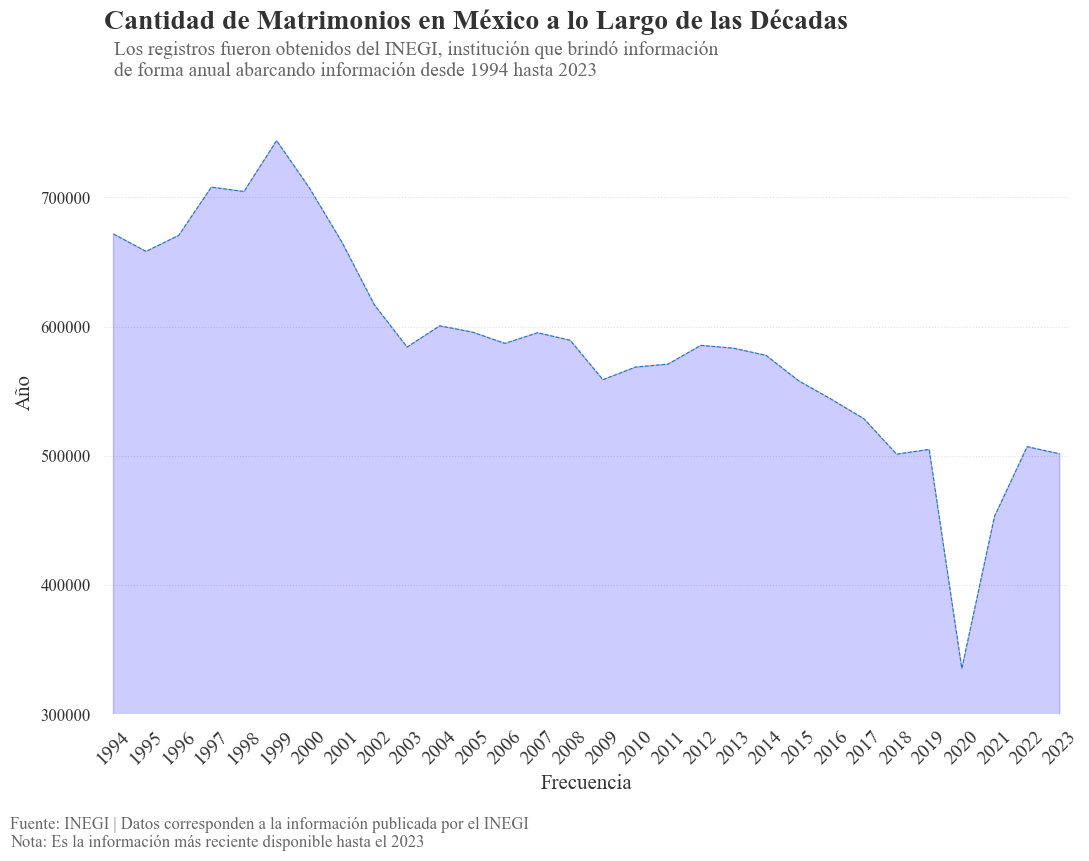

In [15]:
fig, ax = plt.subplots()


(
    data_matrimonios_divorcios
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Año',
            y = 'Matrimonios',
            size = 2,
            linestyle = 'dashed',
            legend = False
        )
    )
)


plt.fill_between(
    data_matrimonios_divorcios['Año'],
    data_matrimonios_divorcios['Matrimonios'],
    color='blue',
    alpha=0.2
)


ax.xaxis.set_tick_params(rotation=45, labelsize=14)
plt.setp(ax.get_xticklabels(), horizontalalignment='center')

ax.set_title('Cantidad de Matrimonios en México a lo Largo de las Décadas',
            loc='left', pad=28, fontweight='semibold')

ax.text(0.01, 0.988, 'Los registros fueron obtenidos del INEGI, institución que brindó información\n' 
         'de forma anual abarcando información desde 1994 hasta 2023',
        transform=ax.transAxes, fontsize=14, color='#666666')

ax.grid(True, axis='y', color='#e0e0e0', linestyle=':', linewidth=0.8)
ax.margins(x=0.01, y=0.03)

ax.set_ylim(bottom=300000, top=800000)

plt.figtext(0.01, 0.04, 
           'Fuente: INEGI | Datos corresponden a la información publicada por el INEGI\n'
           'Nota: Es la información más reciente disponible hasta el 2023',
           ha='left', color='#666666', fontsize=12)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.xlabel('Frecuencia', size=15)
plt.ylabel('Año', size=15)
plt.yticks(np.arange(300000, 800000, 100000))
sns.despine(left=True, bottom=True)
plt.show()

In [16]:
import pandas as pd
from highcharts_core.chart import Chart

In [17]:
def generate_highcharts_config(data_df):
    años = data_df['Año'].tolist()
    matrimonios = data_df['Matrimonios'].tolist()
    divorcios = data_df['Divorcios'].tolist()

    chart_options = {
        'chart': {'type': 'area', 'height': 600},
        'title': {'text': 'Comparativa entre Matrimonios y Divorcios en México a lo Largo de las Décadas', 'align': 'left'},
        'subtitle': {'text': 'Datos del INEGI (1994–2023)', 'align': 'left'},
        'xAxis': {'categories': años, 'labels': {'rotation': 45, 'style': {'fontSize': '14px'}}},
        'yAxis': {'title': {'text': 'Frecuencia', 'style': {'fontSize': '15px'}}, 'gridLineWidth': 1, 'gridLineDashStyle': 'Dot', 'gridLineColor': '#e0e0e0'},
        'legend': {'enabled': True},
        'credits': {'enabled': True, 'text': 'Fuente: INEGI', 'style': {'fontSize': '12px', 'color': '#666666'}},
        'plotOptions': {'area': {'stacking': 'normal', 'lineColor': '#666666', 'lineWidth': 1, 'marker': {'lineWidth': 1, 'lineColor': '#666666'}}},
        'series': [
            {'name': 'Matrimonios', 'data': matrimonios, 'color': 'rgba(0, 0, 255, 0.6)'},
            {'name': 'Divorcios', 'data': divorcios, 'color': 'rgba(0, 128, 0, 0.6)'}
        ]
    }
    return chart_options

config = generate_highcharts_config(data_matrimonios_divorcios)
chart = Chart.from_options(config)
chart.display()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

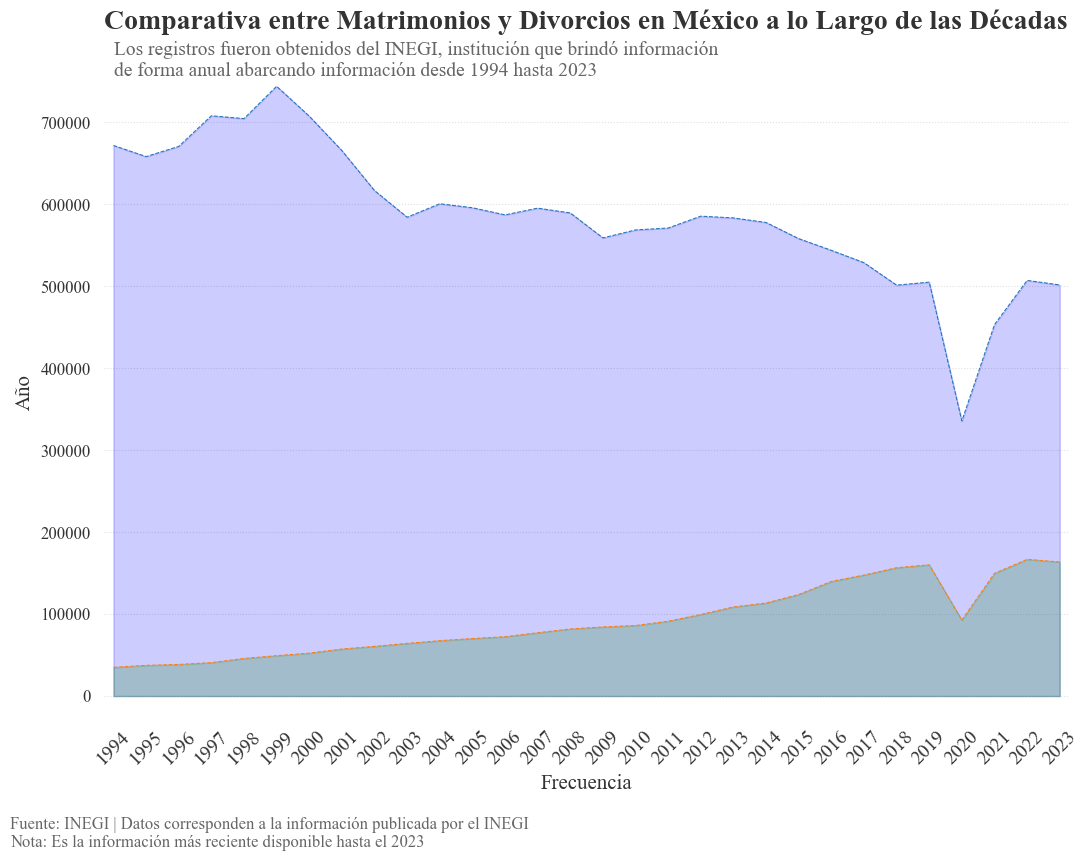

In [18]:
fig, ax = plt.subplots()


(
    data_matrimonios_divorcios
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Año',
            y = 'Matrimonios',
            size = 2,
            linestyle = 'dashed',
            legend = False
        )
    )
)

(
    data_matrimonios_divorcios
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Año',
            y = 'Divorcios',
            size = 2,
            linestyle = 'dashed',
            legend = False
        )
    )
)

plt.fill_between(
    data_matrimonios_divorcios['Año'],
    data_matrimonios_divorcios['Matrimonios'],
    color='blue',
    alpha=0.2
)

plt.fill_between(
    data_matrimonios_divorcios['Año'],
    data_matrimonios_divorcios['Divorcios'],
    color='green',
    alpha=0.2
)

ax.xaxis.set_tick_params(rotation=45, labelsize=14)
plt.setp(ax.get_xticklabels(), horizontalalignment='center')

ax.set_title('Comparativa entre Matrimonios y Divorcios en México a lo Largo de las Décadas',
            loc='left', pad=28, fontweight='semibold')

ax.text(0.01, 0.988, 'Los registros fueron obtenidos del INEGI, institución que brindó información\n' 
         'de forma anual abarcando información desde 1994 hasta 2023',
        transform=ax.transAxes, fontsize=14, color='#666666')

ax.grid(True, axis='y', color='#e0e0e0', linestyle=':', linewidth=0.8)
ax.margins(x=0.01, y=0.03)

plt.figtext(0.01, 0.04, 
           'Fuente: INEGI | Datos corresponden a la información publicada por el INEGI\n'
           'Nota: Es la información más reciente disponible hasta el 2023',
           ha='left', color='#666666', fontsize=12)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.xlabel('Frecuencia', size=15)
plt.ylabel('Año', size=15)
sns.despine(left=True, bottom=True)
plt.show()

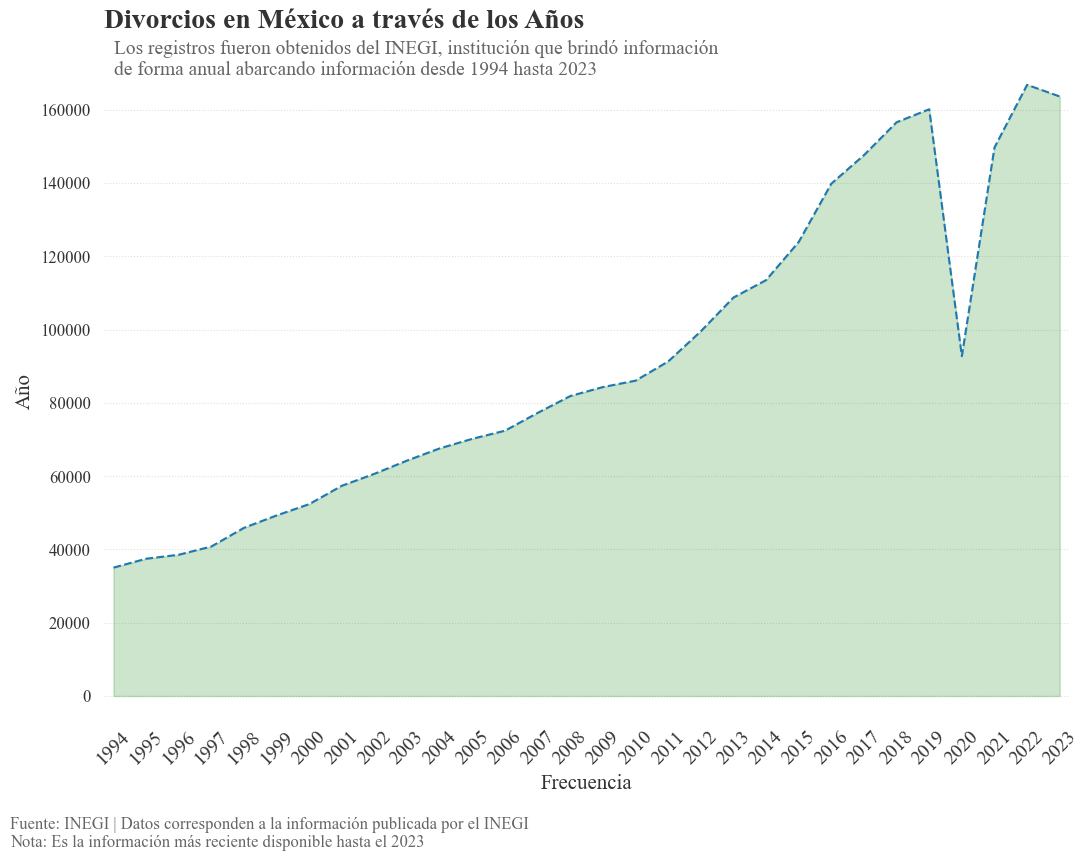

In [19]:
fig, ax = plt.subplots()

(
    data_matrimonios_divorcios
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Año',
            y = 'Divorcios',
            linestyle = 'dashed'
        )
    )
)

plt.fill_between(
    data_matrimonios_divorcios['Año'],
    data_matrimonios_divorcios['Divorcios'],
    color='green',
    alpha=0.2
)

ax.xaxis.set_tick_params(rotation=45, labelsize=14)
plt.setp(ax.get_xticklabels(), horizontalalignment='center')

ax.set_title('Divorcios en México a través de los Años',
            loc='left', pad=28, fontweight='semibold')

ax.text(0.01, 0.988, 'Los registros fueron obtenidos del INEGI, institución que brindó información\n' 
         'de forma anual abarcando información desde 1994 hasta 2023',
        transform=ax.transAxes, fontsize=14, color='#666666')

ax.grid(True, axis='y', color='#e0e0e0', linestyle=':', linewidth=0.8)
ax.margins(x=0.01, y=0.03)

plt.figtext(0.01, 0.04, 
           'Fuente: INEGI | Datos corresponden a la información publicada por el INEGI\n'
           'Nota: Es la información más reciente disponible hasta el 2023',
           ha='left', color='#666666', fontsize=12)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.xlabel('Frecuencia', size=15)
plt.ylabel('Año', size=15)
sns.despine(left=True, bottom=True)
plt.show()

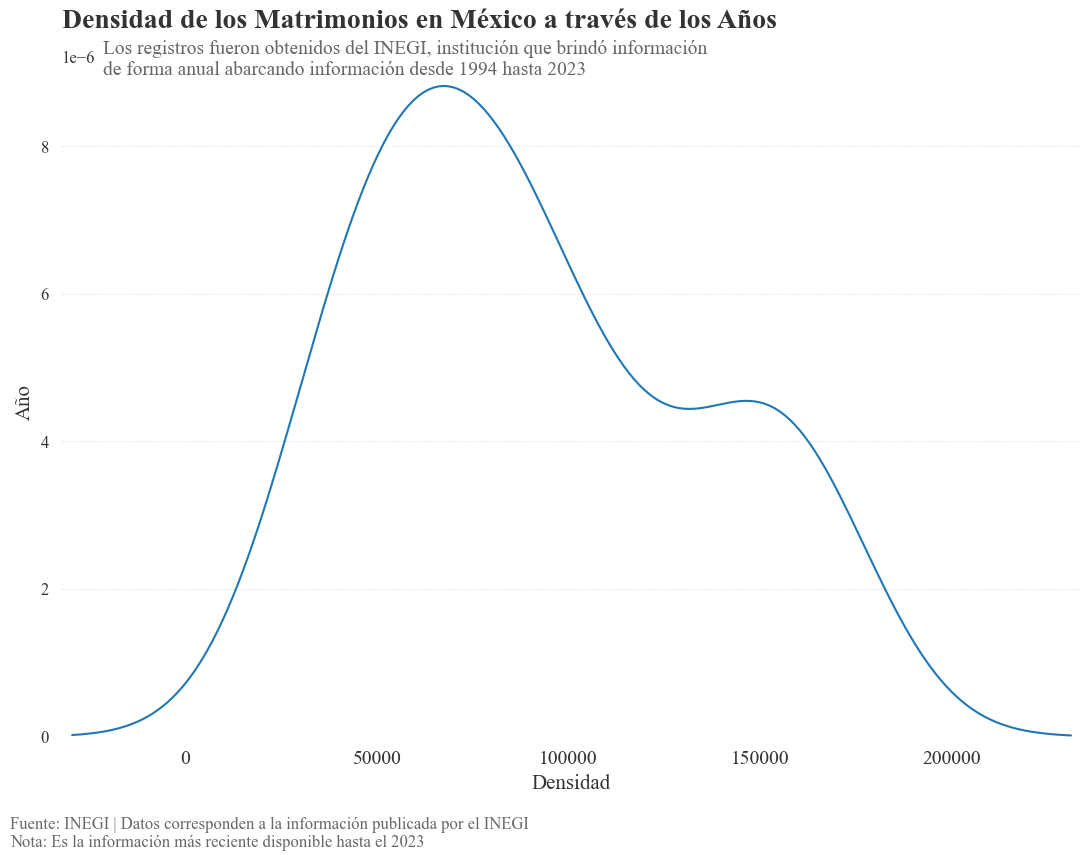

In [20]:
fig, ax = plt.subplots()


(
    data_matrimonios_divorcios
    .pipe(
        lambda df: sns.kdeplot(
            data = df,
            x = 'Divorcios'
        )
    )
)

ax.xaxis.set_tick_params(rotation=0, labelsize=14)
plt.setp(ax.get_xticklabels(), horizontalalignment='center')

ax.set_title('Densidad de los Matrimonios en México a través de los Años',
            loc='left', pad=28, fontweight='semibold')

ax.text(0.04, 0.988, 'Los registros fueron obtenidos del INEGI, institución que brindó información\n' 
         'de forma anual abarcando información desde 1994 hasta 2023',
        transform=ax.transAxes, fontsize=14, color='#666666')

ax.grid(True, axis='y', color='#e0e0e0', linestyle=':', linewidth=0.8)
ax.margins(x=0.01, y=0.03)

plt.figtext(0.01, 0.04, 
           'Fuente: INEGI | Datos corresponden a la información publicada por el INEGI\n'
           'Nota: Es la información más reciente disponible hasta el 2023',
           ha='left', color='#666666', fontsize=12)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.xlabel('Densidad', size=15)
plt.ylabel('Año', size=15)
sns.despine(left=True, bottom=True)
plt.show()